# **By: Basant Ahmed Ragab Mohamed**

## About the Dataset


The loan approval dataset contains financial and demographic information about applicants seeking loans.

It includes attributes such as** CIBIL score, income, employment status, loan amount, loan term, assets value, and loan status**.

These factors collectively help financial institutions evaluate an applicant’s eligibility and risk level before loan approval.

**Goal:**

The main goal is to build a **predictive model** that determines whether a loan application will be **approved or rejected** based on **applicant data**.

The model will help automate decision-making, reduce manual bias, and improve efficiency in the loan approval process.

## Load and Explore the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/content/loan_approval_dataset.csv")

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.shape

(4269, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Checking the null Values

In [7]:
data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


There are no null values

In [8]:
data.duplicated().sum()

np.int64(0)

## Data Cleaning

In [9]:
data = data.drop(columns=['loan_id'], errors='ignore')

### Checking target class's balance

In [10]:
data.columns = data.columns.str.strip().str.lower()


In [11]:
data['loan_status'].value_counts()


,count
loan_status,
Approved,2656
Rejected,1613


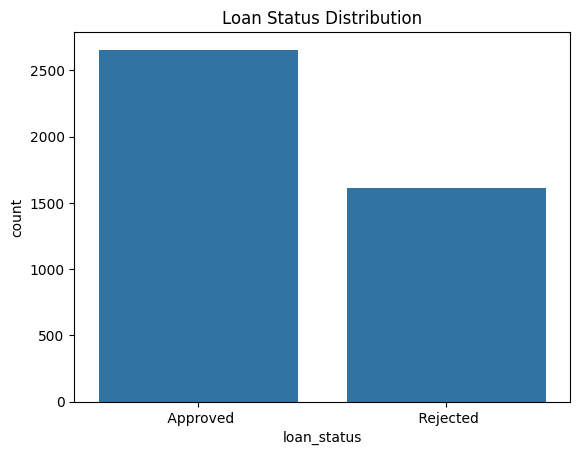

In [12]:
sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')
plt.show()

* The dataset contains 2,656 approved and 1,613 rejected loan applications.

* This shows a **moderate class imbalance**, with more approved loans than rejected ones.

## Exploratory Data Analysis

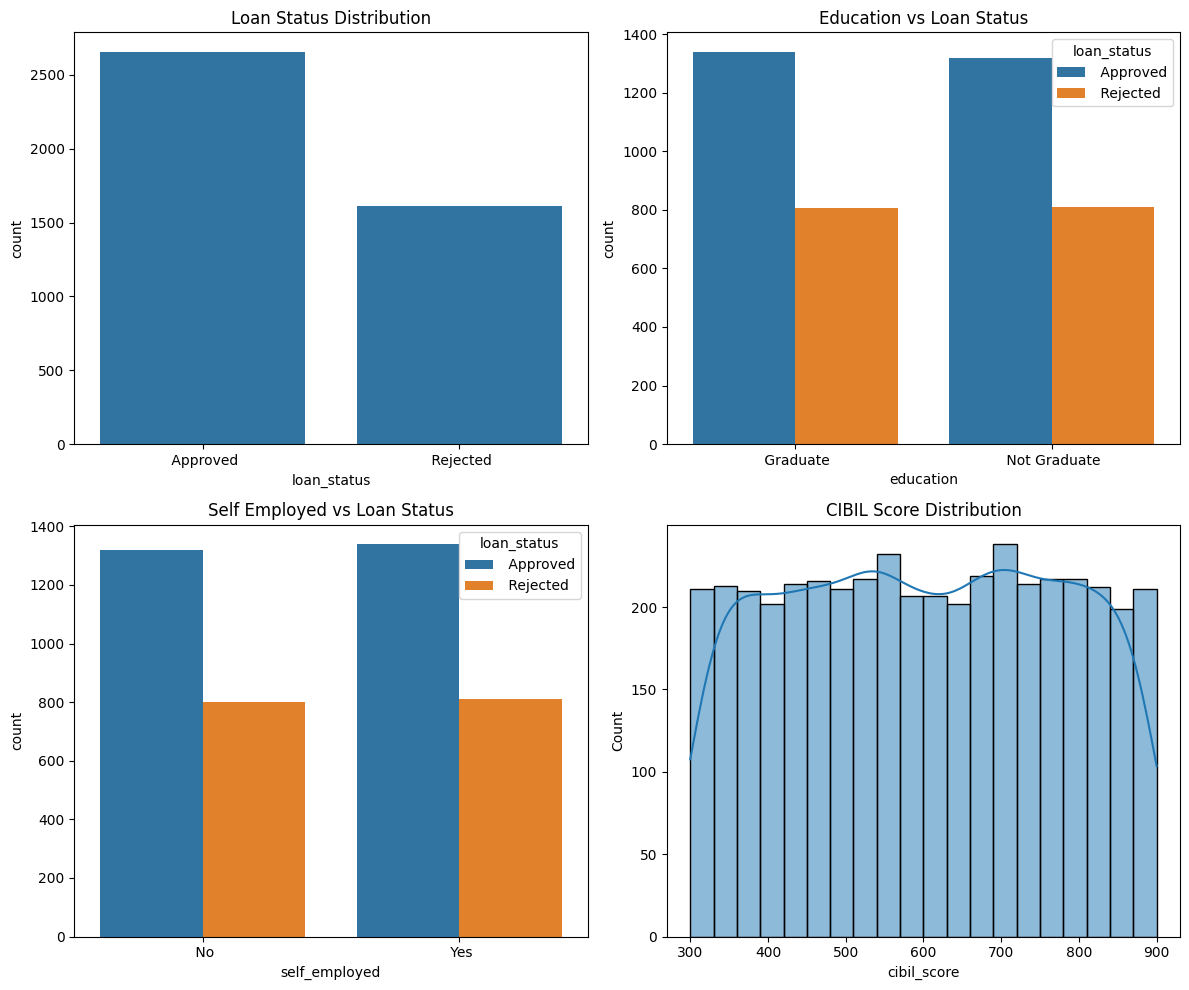

In [13]:
plt.figure(figsize=(12, 10))

# Loan Status Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')

# Education vs Loan Status
plt.subplot(2, 2, 2)
sns.countplot(x='education', hue='loan_status', data=data)
plt.title('Education vs Loan Status')

# Self Employment vs Loan Status
plt.subplot(2, 2, 3)
sns.countplot(x='self_employed', hue='loan_status', data=data)
plt.title('Self Employed vs Loan Status')

# CIBIL Score Distribution
plt.subplot(2, 2, 4)
sns.histplot(data['cibil_score'], bins=20, kde=True)
plt.title('CIBIL Score Distribution')

plt.tight_layout()
plt.show()


**Insights:**

* More Approved loans than Rejected ones (imbalance present).

* Both Graduates and Non-Graduates have approvals, but Graduates seem slightly higher.

* Self-employed people have roughly similar approval rates to others.

* CIBIL scores appear fairly uniform — we’ll later check if higher scores correlate with approvals.

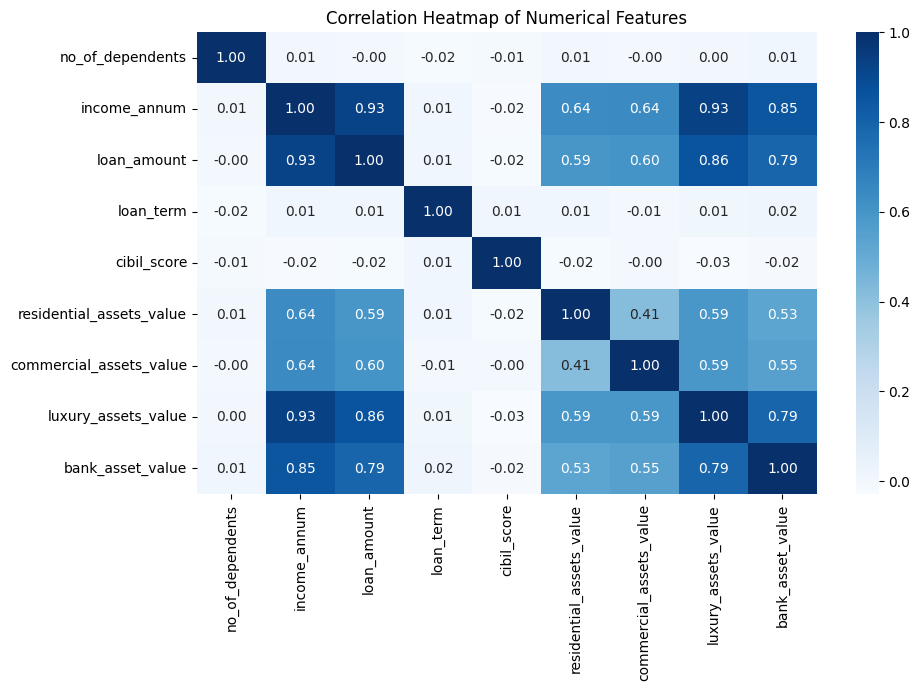

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


**Insights:**

* Strong positive correlation between **income_annum, loan_amount, and luxury_assets_value (≈ 0.9)** — higher income → larger loan & more valuable assets.

* **Bank asset** value is also **highly correlated with income and loan amount (≈ 0.8).**

* **CIBIL score and loan term show** **little correlation** with other features — they vary **independently**.

* The low correlations of most features with loan_status (not shown here since it’s categorical) suggest that categorical variables like education and employment status will be important for prediction.

### Numerical Distributions

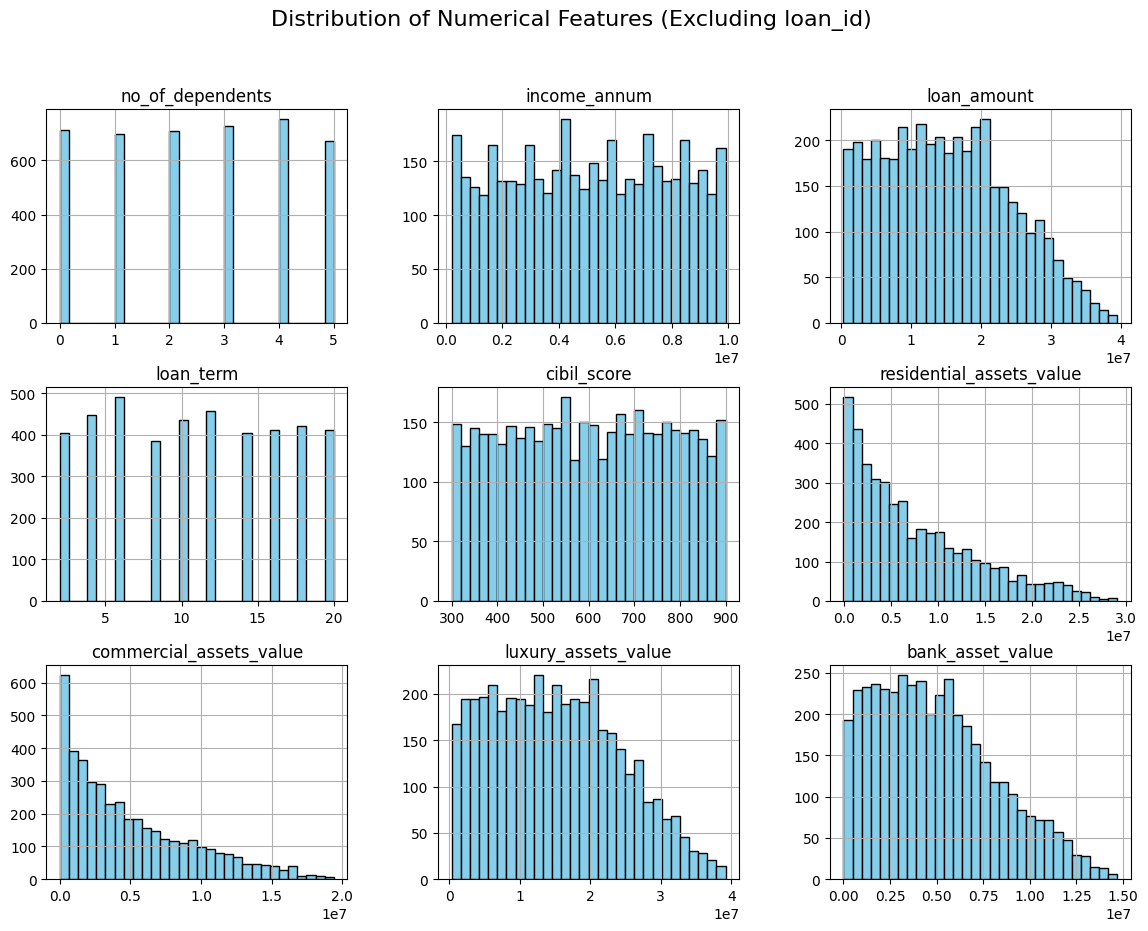

In [15]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('loan_id', errors='ignore')

data[numeric_cols].hist(figsize=(14, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features (Excluding loan_id)", fontsize=16)
plt.show()


Insights:

1. no_of_dependents

    * Fairly uniform distribution across categories (0–5 dependents).

    * Indicates a balanced mix of applicants with different family responsibilities.

2. income_annum

    * Fairly evenly spread income levels with no strong skew.

    * Suggests applicants come from a wide range of income brackets.

3. loan_amount

    * Right-skewed distribution (more applicants with smaller loans).

    * Most applicants apply for lower loan amounts; very few for extremely high loans.

4. loan_term

    * Nearly uniform distribution, implying varied loan durations are requested.

    * No dominant loan term preference among applicants.

5. cibil_score

    * Fairly uniform between 300–900, covering the full CIBIL score range.

    * Dataset includes both high- and low-credit applicants, useful for modeling risk.

6. residential_assets_value

    * Right-skewed — majority of applicants have lower residential asset values.

    * High-value residential assets are less common.

7. commercial_assets_value

    * Also right-skewed — most applicants own few or low-value commercial assets.

    * A small number have significantly higher commercial asset values.

8. luxury_assets_value

    * Right-skewed, with many applicants having lower luxury asset holdings.

    * Indicates luxury assets are concentrated among a few high-net-worth individuals.

9. bank_asset_value

    * Mildly right-skewed; many applicants have moderate bank assets.

    * Suggests that bank savings are relatively stable but vary widely across individuals.

### Relationship Between Key Features and Loan Status

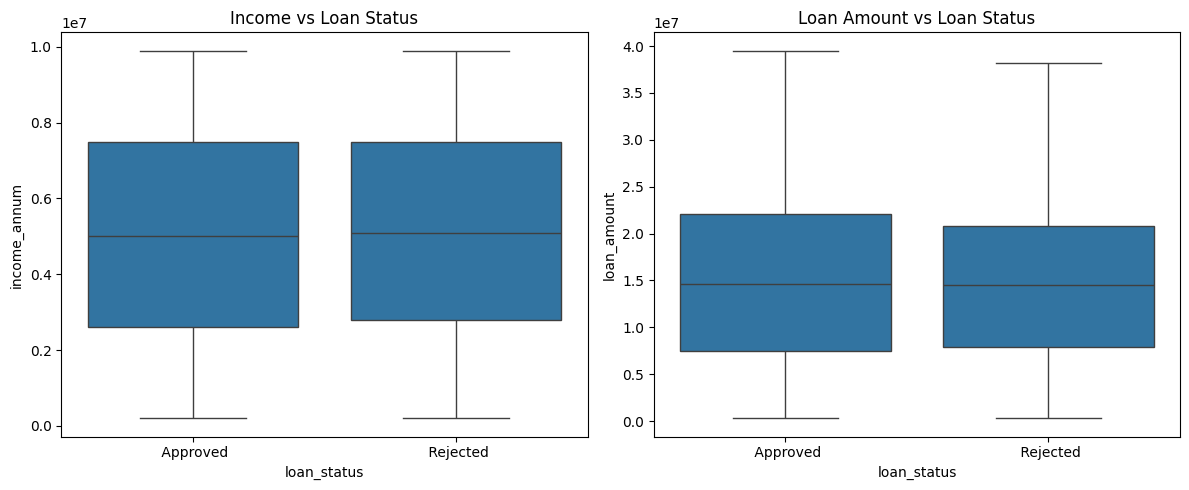

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='income_annum', data=data)
plt.title('Income vs Loan Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status', y='loan_amount', data=data)
plt.title('Loan Amount vs Loan Status')

plt.tight_layout()
plt.show()

**Insights:**

* **Income and loan amount** alone do **not strongly determine loan approval**.

* Approved applicants display slightly higher variation in both income and loan amount, indicating a broader financial profile.

* Some applicants with high loan amounts still receive approval, suggesting that factors such as credit score, employment type, and asset value have a greater impact on the final decision.



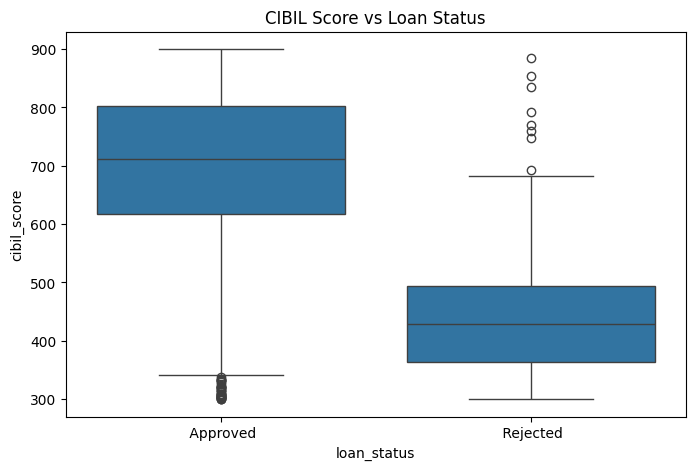

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='cibil_score', data=data)
plt.title('CIBIL Score vs Loan Status')
plt.show()


Insights:

* **Approved applicants** generally have much **higher CIBIL** scores than rejected ones.

* The **median CIBIL score for approved** loans is around **700–750**, while for **rejected loans** it’s closer to **400–450**.

* There is a clear separation between the two groups, indicating that **CIBIL score is a strong predictor** of loan approval.

* A few outliers exist, but the overall trend shows that higher credit scores lead to higher approval chances.

### Checking the Outliers

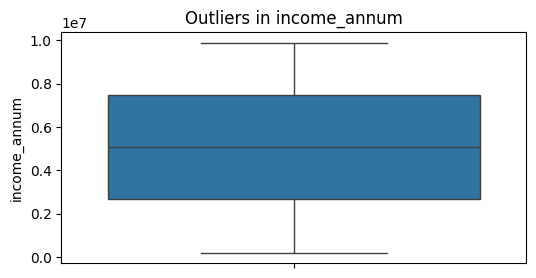

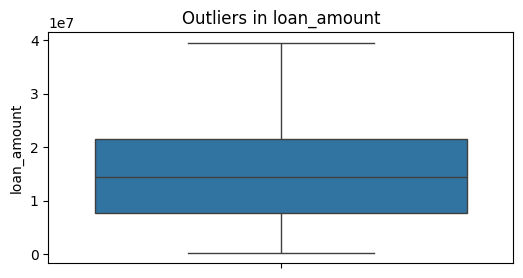

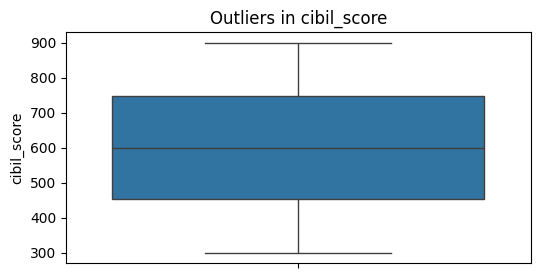

In [18]:
for col in ['income_annum', 'loan_amount', 'cibil_score']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data[col])
    plt.title(f'Outliers in {col}')
    plt.show()


*Some mild outliers were observed in income, loan amount, and credit score, but since they represent realistic financial variations, they were retained for modeling.*

### Encoding and Preparation for Modeling

In [19]:
# Define features and target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [20]:
categorical_cols = ['education', 'self_employed']
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])


Converted education and self_employed to numeric labels (e.g., Graduate = 0, Not Graduate = 1).

In [21]:
y = LabelEncoder().fit_transform(y)

loan_status is encoded ( Approved = 1, Rejected = 0).

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.294102,-0.995559,-1.007288,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304
1,-1.473548,1.004461,0.992765,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936
2,0.295621,-0.995559,-1.007288,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316
3,0.295621,-0.995559,-1.007288,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533
4,1.475067,1.004461,0.992765,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172


## Model Building

### Train–Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### **Logistic Regression**

In [25]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [28]:
y_pred_log = log_model.predict(X_test)


### Model Evaluation

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Accuracy: 0.9227166276346604


* The model predicts loan approval correctly for most applicants.

* Indicates strong overall performance with balanced classification results.

In [34]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))



Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854



🔹 Precision (**Approved = 0.93, Rejected = 0.92**)

* Predictions for both classes are **highly reliable**.

* When the model predicts approval, it’s correct about 93% of the time.

🔹 Recall (**Approved = 0.95, Rejected = 0.88**)

* The model captures most approved loans correctly (high recall for class 0).

* Slightly lower recall for rejected loans means a few rejections are misclassified as approvals.

🔹 F1-score (**Avg = 0.92**)

*  **Strong balance **between precision and recall, showing **consistent prediction quality** across both outcomes.

In [32]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Confusion Matrix:
 [[505  26]
 [ 40 283]]


* **505 true approvals and 283 true rejections** show good predictive power.

* **Only 26 false approvals and 40 false rejections** indicate **minimal misclassification.**

*The logistic regression model performs excellently, achieving high accuracy and balanced precision–recall. It effectively distinguishes approved and rejected applicants, though recall for rejections could improve slightly*.

### **Decision Tree**

In [35]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
y_pred_dt = dt_model.predict(X_test)

### Model Evaluation

In [37]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}\n")

Decision Tree Accuracy: 0.9719




* 97.19%, higher than Logistic Regression’s 92.27%.

* Indicates the model captures non-linear patterns better.

In [38]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       531
           1       0.97      0.95      0.96       323

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



* Approved (1): **Precision = 0.97, Recall = 0.95** → few false positives and strong recall.

* Rejected (0): **Precision = 0.97, Recall = 0.98** → excellent identification of rejected applications.

In [39]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:
[[523   8]
 [ 16 307]]


* **Only 24 total misclassifications** (8 false positives + 16 false negatives).

* Model **correctly predicts most cases** in both categories.

*Decision Tree clearly outperforms Logistic Regression, capturing complex decision boundaries and interactions among features.*

## Conclusion

* The **Decision Tree model** achieved an impressive **97.19% accuracy**, outperforming Logistic Regression.

* The model **effectively distinguishes between approved and rejected** loan applications **with high precision and recall**.

* The results suggest that factors like **CIBIL score, income, and loan amount** play a major role in loan approval decisions.

* Despite its strong performance, the Decision Tree may overfit, as it perfectly adapts to training data patterns.

## Recommendations

* Focus on applicants with **medium CIBIL scores or moderate incomes**, where approval decisions are less predictable.

* Encourage applicants to **improve credit scores and maintain stable income levels** to increase approval chances.

* Monitor **loan amount–to–income ratio**, as higher ratios may indicate higher risk and affect approval likelihood.

* Analyze **asset values** (residential, commercial, luxury) in relation to loan approval — stronger asset backing often correlates with approval success.